In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from aide_design import physchem as pc

from aide_design.units import unit_registry as u

from aide_design import utility as ut



# create by Yuhao Du.

Given the desirable concentration and flow rate of the plant, we need to figure out the concentration in the coagulant storage tank by using the mass balance equation.

In [2]:
# flow rate of the system
V_sedimentation = 2*(u.mm/u.s)
# i did not have the ID data of the 1 inch PVC pipe
ID_pipe = 0.96*u.inch
Area_pipe = 0.25*np.pi*(ID_pipe**2)
Q_system = V_sedimentation*Area_pipe
# output the value

# QUES: what is the relation of inlet water pump RPM w/ this value???

print('The flow rate of the system is', (ut.sig(Q_system.to(u.mL/u.s),3)))

The flow rate of the system is 0.934 ml/s


In [3]:
# mass flow of coagulant

# desired conc of PAC per L of water in the system. (0.5-2.5mg/L)(normally fixed range)

conc_PACL = 2.5*(u.mg/u.L)
# conc_PACL = np.array[(0.0,0.5,1.0,1.5)]
MassFlow_coag = conc_PACL*Q_system
print('The mass flow of coagulant in the system is',ut.sig(MassFlow_coag.to(u.mg/u.s),3))

The mass flow of coagulant in the system is 2.33e-3 mg/s


In [4]:
# how many mL of lab concentration are added per L into the reservoir(adjustable)
k_dilution = 3.13*(u.ml/u.l)

# concentration in grams per L of lab solution(normally fixed value)
conc_labsolution = 70.9*(u.g/u.L)

conc_reservoir = conc_labsolution*k_dilution
Q_reservoir = MassFlow_coag/conc_reservoir
print('The volumetric flow rate of solution leaving the reservior \
and entering the system to achieve desired final concentration',Q_reservoir.to(u.mL/u.s))

The volumetric flow rate of solution leaving the reservior and entering the system to achieve desired final concentration 0.01052 milliliter / second


In [5]:

V_reservoir = 1*u.L
V_lab_solution = V_reservoir*conc_reservoir/conc_labsolution
print('The volume of lab concentration solution we need to add into the reservoir is',ut.sig(V_lab_solution,3))

The volume of lab concentration solution we need to add into the reservoir is 3.13 ml


In [6]:
# The flow pumped out of the pump per round(measured by experiment)
Q_perRPM_coag1 = 0.00042*(u.ml/u.s)
# Q_perRPM_coag2 = 0.0025*(u.ml/u.s)
numRPM = Q_reservoir/Q_perRPM_coag1
print('The pump should run with a speed of',numRPM.to(u.dimensionless))

The pump should run with a speed of 25.05 dimensionless


In order to use Yingda's model, we would start from 10 mg/L humic acid and ??? mg/L clay.(which parameter guide the dosage of clay?)
after we can run the system w/ 10 mg/L HA, I plan to do both increase and decrease on the dosage of HA, from 0 mg/L to 15 mg/L, the interval could be 3 mg/L per experiment.

# Pump Property

In [7]:
# water pump: 
QperRPM = ((52*u.ml/(20*u.rpm)))/(0.5*u.min)
print('water pump',QperRPM.to(u.ml))
# taget RPM
#waterpump_speed = 60*Q_system/QperRPM
#print(waterpump_speed.to(u.dimensionless))
# clay pump control by ProCoDA
# coag pump 1
QperRPM_p1 = (1*u.ml/(10*u.rpm))/(4*u.min)
print(QperRPM_p1.to(u.ml))
# coag pump 2 # exp2: 10RPM 3ml 127s
QperRPM_p2 = ((3*u.ml/(10*u.rpm)))/(110*u.s)
print(QperRPM_p2.to(u.ml))

water pump 0.8276 milliliter
0.003979 milliliter
0.02604 milliliter


In [8]:
10*u.rpm

<Quantity(10, 'revolutions_per_minute')>

# Clay & HA dosage

In [12]:
# concentration of the clay
turbidity_target = (100*u.NTU)
print(ut.sig(turbidity_target.to(u.g/u.L),3))

# concentration of the humic acid
conc_HA = 10*(u.mg/u.L)
print(conc_HA.to(u.g/u.L))

# clay&HA in tank
# the concentration of the solution in stock tank is K times concentrated than system requirement
V_mixture = 5*u.L
K_condense = 20
clay_add = turbidity_target*K_condense*V_mixture
HA_add = conc_HA*K_condense*V_mixture

print("so we add",clay_add.to(u.g),"clay and ",HA_add.to(u.g),"humic acid into the system.")

0.170 g/l
0.01 gram / liter
so we add 17 gram clay and  1 gram humic acid into the system.


In [10]:
# coag pump running w/ 16RPM(coag_conc=1.5mg/L), we can have a effluent turbidity from 3 to 4, and the floc blanket can form within\
# a short period of time.

   0 mg/L  3 mg/L  6 mg/L  9 mg/L  12 mg/L  15 mg/L
0   0.634   0.563   0.136   0.109    0.084    0.061
1   0.729   0.717   0.513   0.264    0.128    0.094
2   0.891   0.903   0.793   0.749    0.647    0.308
3   1.062   1.038   1.027   1.002    0.962    0.717
4   1.205   1.193   1.095   1.089    1.057    0.928


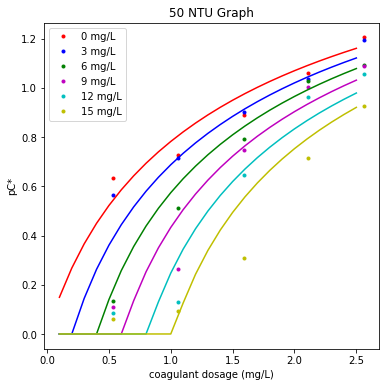

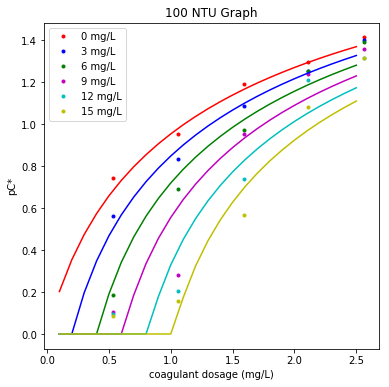

In [11]:
# -*- coding: utf-8 -*-
"""
Created on Tue Aug 8 16:00:38 2017

@author: Sage Weber-Shirk

Last modified: Thu Aug 10 2016
By: Sage Weber-Shirk
"""

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from aide_design import floc_model as floc

from aide_design.units import unit_registry as u

import sys, os
GitPath = os.path.join('~', 'Documents', 'GitHub')
myGitHubdir=os.path.expanduser(GitPath)
sys.path.append(myGitHubdir)


k = 0.24
coag = np.array([0.53, 1.06, 1.59, 2.11, 2.56]) * u.mg/u.L
conc_humic_acid = np.array([0, 3, 6, 9, 12, 15] * u.mg/u.L)
# dataset[0] is the 50NTU, dataset[1] is the 100NTU.
# Within both subgroups, [0] is the pC.0, ranging evenly up to [5] which is the
# pC.15
dataset = np.array([[  # Dataset[0]: the 50NTU datasets
                     [0.634, 0.729, 0.891, 1.062, 1.205],
                     [0.563, 0.717, 0.903, 1.038, 1.193],
                     [0.136, 0.513, 0.793, 1.027, 1.095],
                     [0.109, 0.264, 0.749, 1.002, 1.089],
                     [0.084, 0.128, 0.647, 0.962, 1.057],
                     [0.061, 0.094, 0.308, 0.717, 0.928]
                     ],
                    [  # Dataset[1]: the 100NTU datasets
                     [0.746, 0.953, 1.191, 1.295, 1.414],
                     [0.563, 0.835, 1.085, 1.255, 1.403],
                     [0.185, 0.692, 0.971, 1.254, 1.390],
                     [0.105, 0.280, 0.956, 1.238, 1.361],
                     [0.097, 0.207, 0.740, 1.209, 1.316],
                     [0.084, 0.157, 0.566, 1.084, 1.314]
                     ]
                    ])
indexnames = ['{0} mg/L'.format(i) for i in np.arange(0,16,3)]
Data50NTU = pd.DataFrame(dataset[0], index=indexnames).T

Data100NTU = pd.DataFrame(dataset[1], index=indexnames).T
print(Data50NTU)
    
coagGraph = np.arange(1 * 10**-4, 25.1 * 10**-4, 1 * 10**-4) * u.kg/u.m**3
enerDis = 4.833 * u.mW/u.kg
temperature = 25 * u.degC
resTime = 302 * u.s
tubeDiam = 3/8 * u.inch
# Begin graphing the 50NTU datasets
plt.figure('50NTU', (6,6))
plt.title('50 NTU Graph')
plt.ylabel('pC*')
plt.xlabel('coagulant dosage (mg/L)')



plt.plot(coag, Data50NTU['0 mg/L'], 'r.', coag, Data50NTU['3 mg/L'], 'b.',
         coag, Data50NTU['6 mg/L'], 'g.', coag, Data50NTU['9 mg/L'], 'm.',
         coag, Data50NTU['12 mg/L'], 'c.', coag, Data50NTU['15 mg/L'], 'y.')

# I wish there was a cleaner way to assign these but I can't think
# of what it would be.
line0mg50 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                            50 * u.NTU, coagGraph, 0 * u.mg/u.L, 
                            floc.HumicAcid, floc.PACl, floc.Clay,
                            k, floc.RATIO_HEIGHT_DIAM)
line3mg50 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                            50 * u.NTU, coagGraph, 3 * u.mg/u.L, 
                            floc.HumicAcid, floc.PACl, floc.Clay,
                            k, floc.RATIO_HEIGHT_DIAM)
line6mg50 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                            50 * u.NTU, coagGraph, 6 * u.mg/u.L, 
                            floc.HumicAcid, floc.PACl, floc.Clay,
                            k, floc.RATIO_HEIGHT_DIAM)
line9mg50 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                            50 * u.NTU, coagGraph, 9 * u.mg/u.L, 
                            floc.HumicAcid, floc.PACl, floc.Clay,
                            k, floc.RATIO_HEIGHT_DIAM)
line12mg50 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                             50 * u.NTU, coagGraph, 12 * u.mg/u.L, 
                             floc.HumicAcid, floc.PACl, floc.Clay,
                             k, floc.RATIO_HEIGHT_DIAM)
line15mg50 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                             50 * u.NTU, coagGraph, 15 * u.mg/u.L, 
                             floc.HumicAcid, floc.PACl, floc.Clay,
                             k, floc.RATIO_HEIGHT_DIAM)

x = coagGraph.to(u.mg/u.L)
plt.plot(x, line0mg50, 'r', x, line3mg50, 'b', x, line6mg50, 'g',
         x, line9mg50, 'm', x, line12mg50, 'c', x, line15mg50, 'y')

plt.legend(['0 mg/L', '3 mg/L', '6 mg/L', '9 mg/L','12 mg/L','15 mg/L'], loc = 'best')
plt.show()



# Begin graphing the 100NTU datasets
plt.figure('100NTU', (6,6))
plt.title('100 NTU Graph')
plt.ylabel('pC*')
plt.xlabel('coagulant dosage (mg/L)')

plt.plot(coag, Data100NTU['0 mg/L'], 'r.', coag, Data100NTU['3 mg/L'], 'b.',
         coag, Data100NTU['6 mg/L'], 'g.', coag, Data100NTU['9 mg/L'], 'm.',
         coag, Data100NTU['12 mg/L'], 'c.', coag, Data100NTU['15 mg/L'], 'y.')

line0mg100 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                             100 * u.NTU, coagGraph, 0 * u.mg/u.L, 
                             floc.HumicAcid, floc.PACl, floc.Clay,
                             k, floc.RATIO_HEIGHT_DIAM)
line3mg100 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                             100 * u.NTU, coagGraph, 3 * u.mg/u.L, 
                             floc.HumicAcid, floc.PACl, floc.Clay,
                             k, floc.RATIO_HEIGHT_DIAM)
line6mg100 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                             100 * u.NTU, coagGraph, 6 * u.mg/u.L, 
                             floc.HumicAcid, floc.PACl, floc.Clay,
                             k, floc.RATIO_HEIGHT_DIAM)
line9mg100 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                             100 * u.NTU, coagGraph, 9 * u.mg/u.L, 
                             floc.HumicAcid, floc.PACl, floc.Clay,
                             k, floc.RATIO_HEIGHT_DIAM)
line12mg100 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                              100 * u.NTU, coagGraph, 12 * u.mg/u.L, 
                              floc.HumicAcid, floc.PACl, floc.Clay,
                              k, floc.RATIO_HEIGHT_DIAM)
line15mg100 = floc.pc_viscous(enerDis, temperature, resTime, tubeDiam,
                              100 * u.NTU, coagGraph, 15 * u.mg/u.L, 
                              floc.HumicAcid, floc.PACl, floc.Clay,
                              k, floc.RATIO_HEIGHT_DIAM)

x = coagGraph.to(u.mg/u.L)
plt.plot(x, line0mg100, 'r', x, line3mg100, 'b', x, line6mg100, 'g',
         x, line9mg100, 'm', x, line12mg100, 'c', x, line15mg100, 'y')

plt.legend(['0 mg/L', '3 mg/L', '6 mg/L', '9 mg/L','12 mg/L','15 mg/L'], loc = 'best')
plt.show()
